In [9]:
#!/usr/bin/env python
from __future__ import print_function
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import random

# Data Setup (Function sin(x))

In [11]:
### target function activation ###    
def function_activation(x):
    return np.sin(x)

############# Our target function and x values #########
x_values = np.linspace(0,10,total_samples)
y = [function_activation(x) for x in x_values]

#### getting batches #####
def get_batch(batch_size=32,x_values=x_values,y=y):
    """Builds a batch i.e. (x, f(x)) pair."""
    sampled_index=random.sample(list(enumerate(x_values)), batch_size)
    x_ran=[x_values[idx] for idx,val in sampled_index]
    y_ran=[y[idx] for idx,val in sampled_index]
    x_ran=torch.FloatTensor(x_ran)
    y_ran=torch.FloatTensor(y_ran)
    return x_ran.reshape(x_ran.shape[0],1), y_ran.reshape(y_ran.shape[0],1)

# Define model

In [12]:
def model_run(hidden_sizes=50,lr=0.01,batch_size=100,total_samples=1000,epochs=2000):
    input_size = 1
    output_size = 1
    
    model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_sizes),
                      torch.nn.ReLU(),
                      torch.nn.Linear(hidden_sizes, output_size))

    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for batch_idx in range(epochs): #infinite loop
        batch_x, batch_y = get_batch(batch_size,x_values,y)
    
        # Reset gradients to zero for each batch before starting calculation for gradient
        optimizer.zero_grad()

        # Forward pass
        output = F.smooth_l1_loss(model(batch_x), batch_y) #calculating error- Function that uses a squared term if the absolute element-wise error falls below beta and an L1 term otherwise.
        loss = output.item()

        # Backward pass
        output.backward()

        # Apply gradients
        optimizer.step()

    ###### prediction #####
    x_pred=torch.FloatTensor(x_values)
    x_pred=x_pred.reshape(x_pred.shape[0],1)
    y_pred=model(x_pred).detach().numpy()

    ### Error Plot
    plt.figure()
    plt.plot(x_values, y, 'o', color='black')
    plt.plot(x_values, y_pred, 'o', color='blue')

# Running with 50 hidden neurons

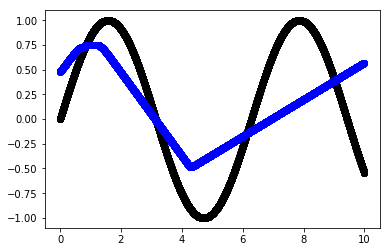

In [13]:
model_run(hidden_sizes=50,lr=0.01,batch_size=100,total_samples=1000,epochs=2000)

# Running with 25 hidden neurons

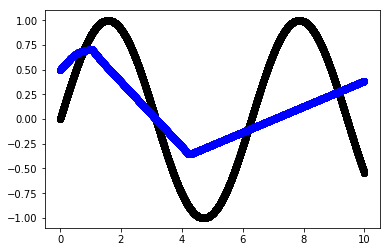

In [14]:
model_run(hidden_sizes=25,lr=0.01,batch_size=100,total_samples=1000,epochs=2000)

# Running with 10 hidden neurons

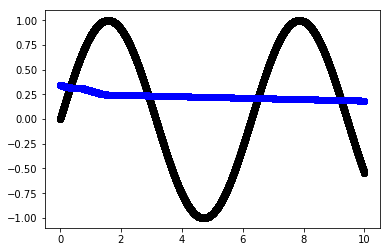

In [16]:
model_run(hidden_sizes=10,lr=0.01,batch_size=100,total_samples=1000,epochs=2000)

# Running with 100 hidden neurons

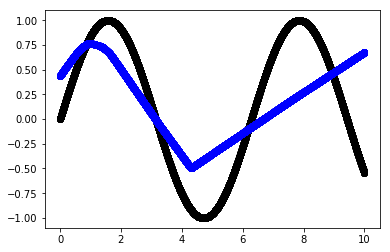

In [19]:
model_run(hidden_sizes=100,lr=0.01,batch_size=100,total_samples=1000,epochs=2000)

# Running with 500 hidden neurons

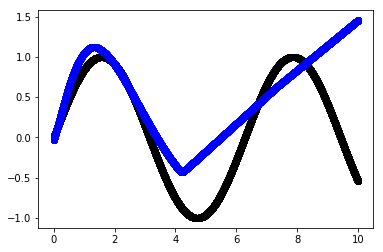

In [20]:
model_run(hidden_sizes=500,lr=0.01,batch_size=100,total_samples=1000,epochs=2000)

# Running with 5000 hidden neurons

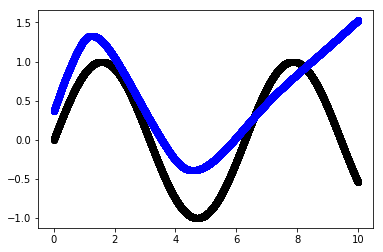

In [21]:
model_run(hidden_sizes=5000,lr=0.01,batch_size=100,total_samples=1000,epochs=2000)

# Answer (2_c). Reducing the hidden neurons decreases the complexity of the model and starts to predict a linear line because of oversimplification 
# but as we try to increase the hidden neurons, the model tries replicate the sin function much more effectively

# Question 2(1_d) With Sigmoid Activation function

In [42]:
############# Our target function and x values #########
x_values = np.linspace(0,10,total_samples)
y = [function_activation(x) for x in x_values]

def model_run_sigmoid(hidden_sizes=50,lr=0.01,batch_size=100,total_samples=1000,epochs=2000):
    input_size = 1
    output_size = 1
    
    model = torch.nn.Sequential(torch.nn.Linear(input_size, hidden_sizes),
                      torch.nn.Sigmoid(),
                      torch.nn.Linear(hidden_sizes, output_size))

    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for batch_idx in range(epochs): #infinite loop
        batch_x, batch_y = get_batch(batch_size,x_values,y)
    
        # Reset gradients to zero for each batch before starting calculation for gradient
        optimizer.zero_grad()

        # Forward pass
        output = F.smooth_l1_loss(model(batch_x), batch_y) #calculating error- Function that uses a squared term if the absolute element-wise error falls below beta and an L1 term otherwise.
        loss = output.item()

        # Backward pass
        output.backward()

        # Apply gradients
        optimizer.step()

    ###### prediction #####
    x_pred=torch.FloatTensor(x_values)
    x_pred=x_pred.reshape(x_pred.shape[0],1)
    y_pred=model(x_pred).detach().numpy()

    ### Error Plot
    plt.figure()
    plt.plot(x_values, y, 'o', color='black')
    plt.plot(x_values, y_pred, 'o', color='blue')

# Sigmoid run time

--- 46.623889684677124 seconds ---


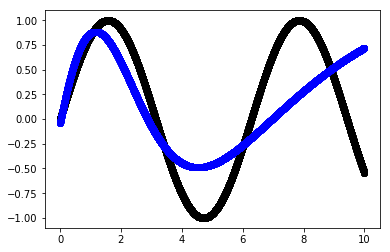

In [57]:
import time
start_time = time.time()
model_run_sigmoid(hidden_sizes=300,lr=0.01,batch_size=50,total_samples=1000,epochs=20000)
print("--- %s seconds ---" % (time.time() - start_time))

# Relu run time for same model

--- 48.72264075279236 seconds ---


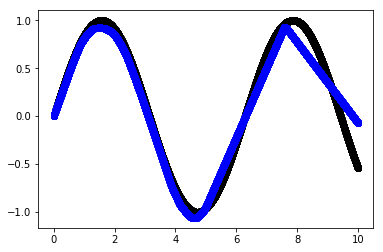

In [58]:
import time
start_time = time.time()
model_run(hidden_sizes=300,lr=0.01,batch_size=50,total_samples=1000,epochs=20000)
print("--- %s seconds ---" % (time.time() - start_time))

# Answer 2(d). The run time does reduce in Sigmoid activation bu only slightly, but relu produces are better result

# Question 2(e) Analysis on Function x^3

In [60]:
### target function activation ###    
def function_activation(x):
    return pow(x,3)

############# Our target function and x values #########
x_values = np.linspace(0,10,total_samples)
y = [function_activation(x) for x in x_values]

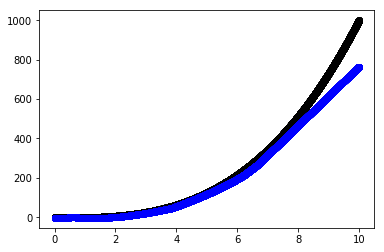

In [61]:
model_run(hidden_sizes=5000,lr=0.01,batch_size=100,total_samples=1000,epochs=2000)

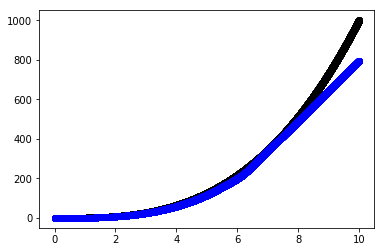

In [62]:
model_run(hidden_sizes=500,lr=0.01,batch_size=100,total_samples=1000,epochs=2000)

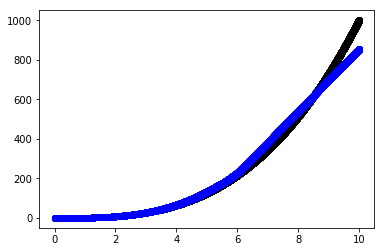

In [64]:
model_run(hidden_sizes=100,lr=0.01,batch_size=100,total_samples=1000,epochs=2000)

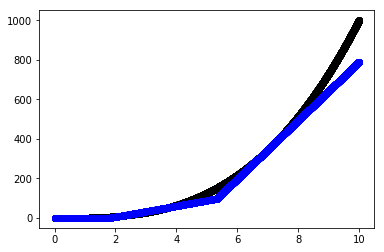

In [65]:
model_run(hidden_sizes=10,lr=0.01,batch_size=100,total_samples=1000,epochs=2000)

# This function requires less hidden neurons to get to the optimum approximation of function as opposed to sin(X) but follows the same rule of oversimplification in less layers and over fitting in too many hidden layers

--- 46.71558880805969 seconds ---


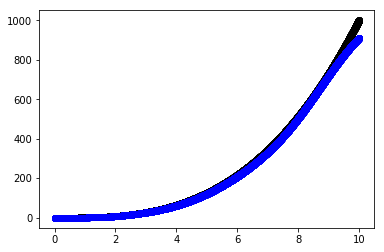

In [66]:
import time
start_time = time.time()
model_run_sigmoid(hidden_sizes=300,lr=0.01,batch_size=50,total_samples=1000,epochs=20000)
print("--- %s seconds ---" % (time.time() - start_time))

--- 50.50968790054321 seconds ---


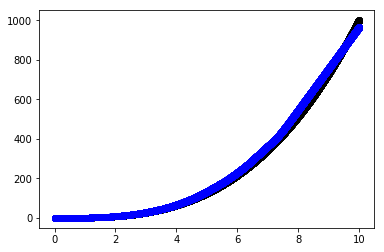

In [67]:
import time
start_time = time.time()
model_run(hidden_sizes=300,lr=0.01,batch_size=50,total_samples=1000,epochs=20000)
print("--- %s seconds ---" % (time.time() - start_time))

# Sigmoid activation and Relu provides almost similar fit but sigmoid took 4 seconds less than relu